In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Cargar el conjunto de datos
df = pd.read_csv("covid.csv")

In [6]:
# Eliminar columnas innecesarias
columns_to_drop = ['id', 'patient_type', 'entry_date', 'date_symptoms', 'date_died', 'other_disease', 'icu']
df.drop(columns_to_drop, axis=1, inplace=True)

In [7]:
# Filtrar filas con valores de 98 y 99 en columnas específicas
filter_conditions = (df['covid_res'] != 3) & (df['contact_other_covid'] != 99) & (df['tobacco'] != 98) & (df['obesity'] != 98) & (df['copd'] != 98) & (df['diabetes'] != 98) & (df['asthma'] != 98) & (df['inmsupr'] != 98) & (df['hypertension'] != 98) & (df['cardiovascular'] != 98) & (df['renal_chronic'] != 98) & (df['intubed'] != 98) & (df['pregnancy'] != 98) & (df['pneumonia'] != 98)
df = df[filter_conditions]

In [8]:
# Asignar variables independientes y dependientes
X = df.drop('covid_res', axis=1)
y = df['covid_res']

In [9]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Entrenar el modelo Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [11]:
# Obtener las predicciones en el conjunto de prueba
y_pred = naive_bayes.predict(X_test)

In [12]:
# Evaluar el desempeño del modelo
accuracy = metrics.accuracy_score(y_test, y_pred)
print("La precisión del modelo es: {:.2f}% ".format(accuracy * 100))

La precisión del modelo es: 62.54% 


In [13]:
# Crear la matriz de confusión
cm = metrics.confusion_matrix(y_test, y_pred)

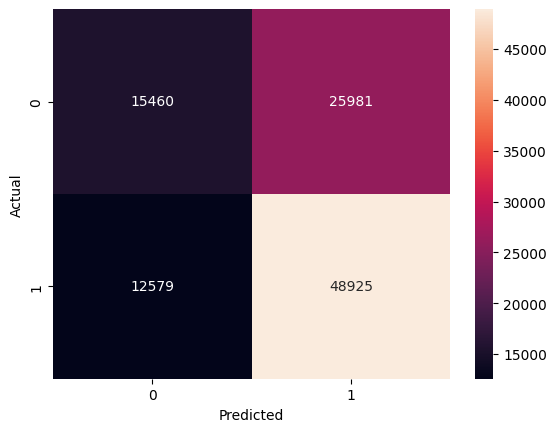

In [14]:
# Graficar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
# Crear una fila con los datos del usuario
user_data = pd.DataFrame({
    'sex': [2],
    'intubed': [2],
    'pneumonia': [2],
    'age': [35],
    'pregnancy': [2],
    'diabetes': [2],
    'copd': [2],
    'asthma': [2],
    'inmsupr': [2],
    'hypertension': [2],
    'cardiovascular': [2],
    'obesity': [2],
    'renal_chronic': [2],
    'tobacco': [2],
    'contact_other_covid': [2]
})

In [16]:
# Realizar predicción
probability = naive_bayes.predict_proba(user_data)[0][1]

In [17]:
# Imprimir el resultado de la probabilidad
print("Probabilidad de COVID-19: {:.2f}%".format(probability * 100))

Probabilidad de COVID-19: 13.92%
